# Primeri metoda mašinskog učenja
> ### Jupyter, R, Iris dataset
### Master program "Digitalna transformacija", FEFA, 2018-2019

Programski jezik R je vrlo pogodan za upoznavanje sa metodama mašinskog učenja. Sam R ima desetine skupova podataka koji su pogodni za vežbu i niz bliblioteka (_library_) koje služe za obuku algoritma. Koje sve skupove podataka imate na raspolaganju možete da vidite sa **data()** i jednim _shift+enter_ da pređete u sledeću ćeliju.

In [20]:
data()

_Iris_ je tipski primer skupa podataka za mašinsko učenje pa ćemo se ovde malo više njime pozabaviti. U pitanju je cvet (Perunika) za koji su izdvojene četiri karakteristike: dužina i širina čašičnog listića (sepal length/width) i dužina i listića latice (petal length/width).
![Vrste perunike](iris-machinelearning.png)

In [21]:
data(iris)

**str(...)** će vam dati strukturu traženog skupa podataka. U ovom slučaju, iris je _data frame_ sa pet kolona od čega su prve četiri numeričke, a peta je tipa _factor_ i označava vrstu perunike.

In [22]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Da pogledamo prvo same podatke, odnosno prvih nekoliko redova koristeći funkciju `head`. Ukoliko hoćemo pregled samo za jednu vrstu, možemo da je izdvojimo sa `[iris$Species="`_ime vrste_`",]`.

In [23]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [24]:
head(iris[iris$Species=="virginica",])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
101,6.3,3.3,6.0,2.5,virginica
102,5.8,2.7,5.1,1.9,virginica
103,7.1,3.0,5.9,2.1,virginica
104,6.3,2.9,5.6,1.8,virginica
105,6.5,3.0,5.8,2.2,virginica
106,7.6,3.0,6.6,2.1,virginica


### Eksplorativna analiza podatka

Podaci pokazuju da je __Petal.Length__ klase setosa kraći nego __Petal.Length__ drugih klasa.

In [25]:
# Uzimamo vrednost kolone "Species" za sve vrste gde je Petal.Length < 2
subset(iris, Petal.Length < 2)[,"Species"]

[1] setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa
[11] setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa
[21] setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa
[31] setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa
[41] setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

Izgleda da imamo prvi kriterijum za razdvajanje klasa.

Da pogledamo sada osnovnu statistiku za svaku kolonu koristeći __summary__:

In [26]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Umesto brojeva bolje je da pogledamo grafikon.

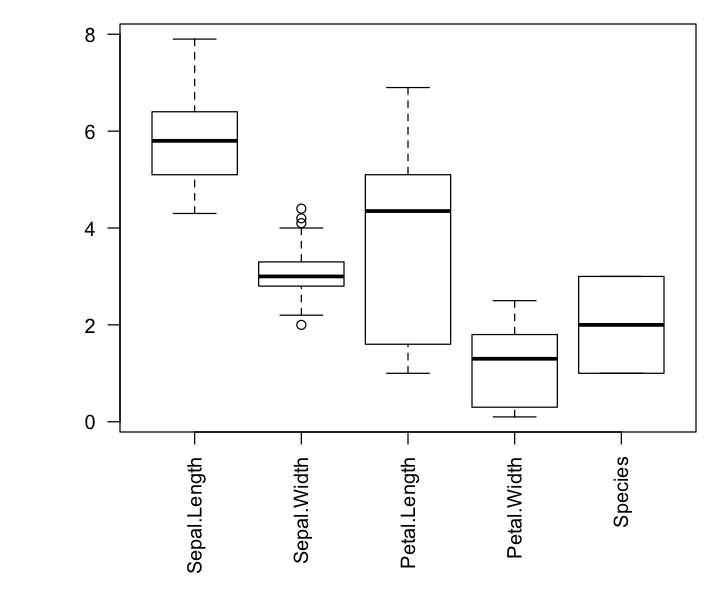

In [27]:
par(mar=c(7,5,1,1)) # više prostora za oznake
boxplot(iris,las=2)

Ovo nam daje grubu procenu raspodele vrednosti za svaki atribut. Možda ima smisla videti distribuciju vrednosti koje se odnose na svaku klasu, jer već imamo njihove oznake.

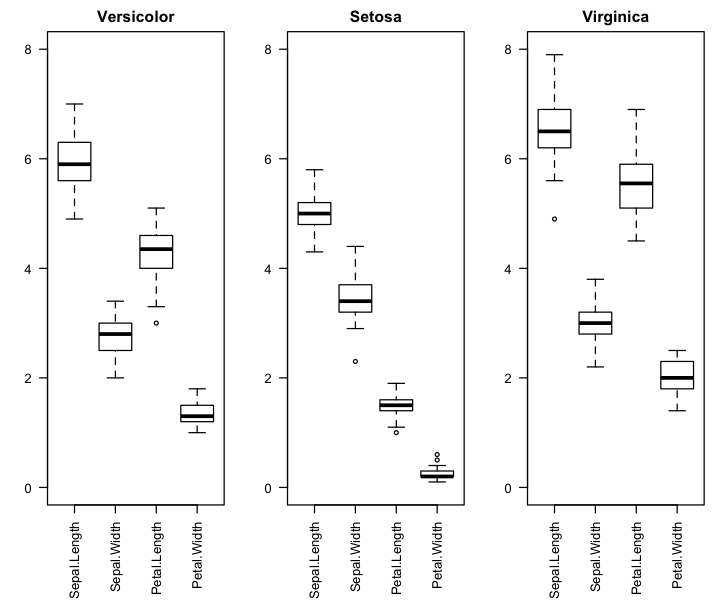

In [28]:
irisVer <- subset(iris, Species == "versicolor")
irisSet <- subset(iris, Species == "setosa")
irisVir <- subset(iris, Species == "virginica")
par(mfrow=c(1,3),mar=c(6,3,2,1))
boxplot(irisVer[,1:4], main="Versicolor",ylim = c(0,8),las=2)
boxplot(irisSet[,1:4], main="Setosa",ylim = c(0,8),las=2)
boxplot(irisVir[,1:4], main="Virginica",ylim = c(0,8),las=2)

Histogrami (koje bi trebalo raditi po atributima) su veoma korisni:

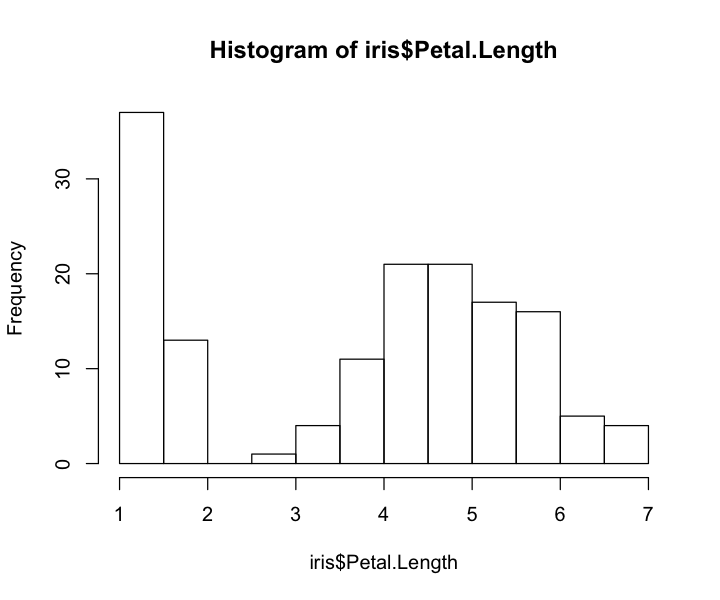

In [29]:
hist(iris$Petal.Length)

Da vidimo histograme za svaki pojedinačni atribut, jedan za svaku klasu:

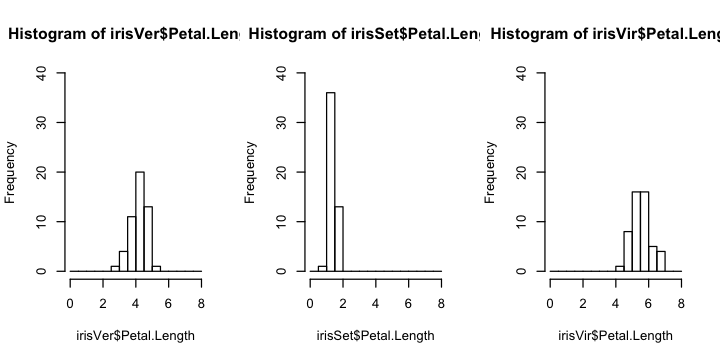

In [30]:
par(mfrow=c(1,3))
options(repr.plot.width=6, repr.plot.height=3) # ovde malo smanjimo sliku po visini
hist(irisVer$Petal.Length,breaks=seq(0,8,l=17),xlim=c(0,8),ylim=c(0,40))
hist(irisSet$Petal.Length,breaks=seq(0,8,l=17),xlim=c(0,8),ylim=c(0,40))
hist(irisVir$Petal.Length,breaks=seq(0,8,l=17),xlim=c(0,8),ylim=c(0,40))
options(repr.plot.width=6, repr.plot.height=5) # vratimo sad na normalno

Oni pokazuju da su raspodele vrednosti za `Petal.Length` različite za svaku klasu. 

### Korelacija među varijablama

Kako se jedna varijabla odnosi prema drugoj? Da li su one korelisane?

In [31]:
corr <- cor(iris[,1:4])
round(corr,3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000,-0.118,0.872,0.818
Sepal.Width,-0.118,1.000,-0.428,-0.366
Petal.Length,0.872,-0.428,1.000,0.963
Petal.Width,0.818,-0.366,0.963,1.000


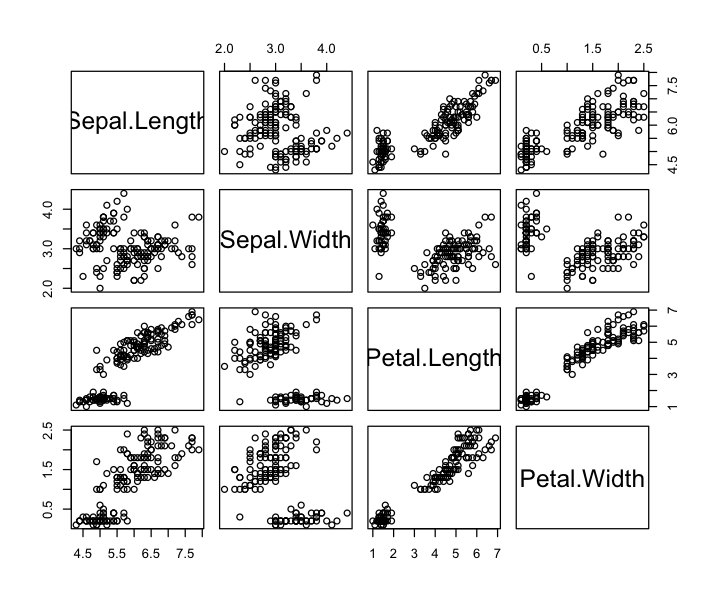

In [32]:
pairs(iris[,1:4])

Da li se (vizuelne) korelacije razlikuju za svaku klasu? Hajde da obojimo tačke po klasama.

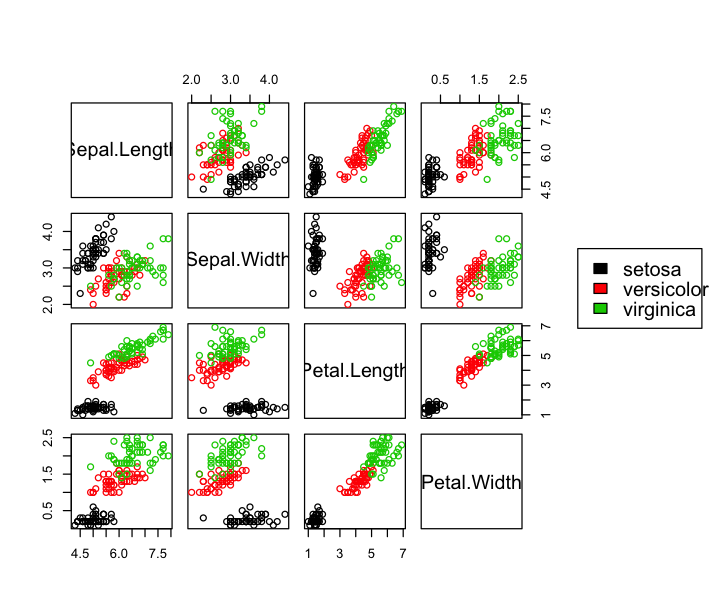

In [33]:
pairs(iris[,1:4],col=iris[,5],oma=c(4,4,6,12))
par(xpd=TRUE)
legend(0.85,0.6, as.vector(unique(iris$Species)),fill=c(1,2,3))

Drugi način da se iscrtaju vrednosti okvira podataka da bi se videle korelacije i vrednosti uopšte su paralelne koordinate. U R-u to izgleda ovako:

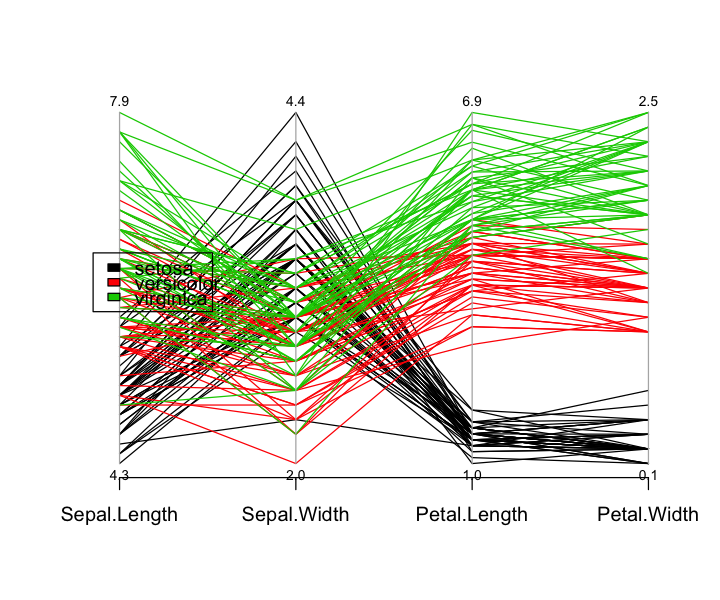

In [34]:
library(MASS)
parcoord(iris[,1:4], col=iris[,5],var.label=TRUE,oma=c(4,4,6,12))
par(xpd=TRUE)
legend(0.85,0.6, as.vector(unique(iris$Species)),fill=c(1,2,3))

### Primer mašinskog učenja -- linearni model
Iako linearni model nije najbolje rešenje za skup podataka koji ima nominalni umesto numeričkog izlaza, ovde pokazujemo da nije neupotrebljiv. Očigledno je linerani model dovoljno robustan da i ovo "proguta".

Da bi učenje mogli kasnije da evaluaramo, potrebno je uzeti slučajan uzorak koji ostavljamo za test. Te podatke nećemo korsititi za učenje. Funkcija `sample` nam izdvaja slučajan uzorak iz niza.  

In [37]:
s=sample(1:150,30)
s

[1] 101  82  86  63  18  91   9 135  66 120  24  61  30  73  14 124   1  28 115
[20]  95 140 106 129  59  80  55 132  31 110 145

U skup podataka namenjen učenju (**train**) stavljamo sve što nismo ostavili za evaluaciju (**test**).

In [38]:
x_train=iris[-s,1:4]

In [39]:
x_test=iris[s,1:4]

In [40]:
dim(x_train)

[1] 120   4

In [41]:
# Vrstama pridružujemo brojne vrednosti 1, 2, 3.
y=as.numeric(iris[,5])

In [42]:
y_train=y[-s]

In [43]:
length(y_train)

[1] 120

Podatke za učenje onda spojimo u jedan _data frame_.

In [44]:
x=cbind(x_train,y_train)

In [45]:
head(x)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,y_train
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1


Sad ide učenje, odnosno fitovanje parametara lienarnog modela.

In [46]:
linear=lm(y_train~.,data=x)

In [47]:
head(y)

[1] 1 1 1 1 1 1

In [48]:
summary(linear)


Call:
lm(formula = y_train ~ ., data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61883 -0.14087  0.01405  0.12133  0.57673 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.096587   0.235669   4.653 8.81e-06 ***
Sepal.Length -0.111605   0.062894  -1.774  0.07863 .  
Sepal.Width  -0.005327   0.067285  -0.079  0.93703    
Petal.Length  0.193865   0.063444   3.056  0.00279 ** 
Petal.Width   0.703999   0.109458   6.432 3.00e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2171 on 115 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.9307 
F-statistic: 400.5 on 4 and 115 DF,  p-value: < 2.2e-16


Da vidimo kakva nam je predikcija za onaj skup podataka koji smo ostavili po strani.

In [49]:
predicted=predict(linear,x_test)

In [50]:
y_test=y[s]

In [51]:
head(y_test)

[1] 3 2 2 2 1 2

In [52]:
head(predicted)

101        82        86        63        18        91 
3.2990881 1.8912776 2.4076398 1.8947003 0.9913703 2.1667176

In [53]:
cbind(y_test,round(predicted))

,y_test,
101,3,3
82,2,2
86,2,2
63,2,2
18,1,1
91,2,2
9,1,1
135,3,2
66,2,2
120,3,2


Probajte ovo za još neki metod.